In [1]:
import time

# starting time
start = time.time()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model,Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from tensorflow.keras.layers import BatchNormalization
import os
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
print(os.listdir("C:/kidney disease/"))

['test', 'train']


In [3]:
size=224

train_images=[]
train_labels=[]
for directory_path in glob.glob("C:/kidney disease/train/*"):
    label=directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.JPG")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)   
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [4]:
test_images=[]
test_labels=[]
for directory_path in glob.glob("C:/kidney disease/test/*"):
    label=directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.JPG")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [6]:
X_train,y_train,X_test,y_test = train_images,train_labels_encoded,test_images,test_labels_encoded



In [7]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [8]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [9]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [10]:
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

# import libraries for cross validation
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import roc_curve, auc

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
import numpy as np

In [11]:
  model=Sequential() 
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=(1,1),padding="same",activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(1,1),padding="same",activation="relu"))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
  
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


  model.add(Flatten())
  x=model.output
  x=Dense(224,activation="relu")(x)
  x = Dropout(0.2)(x)
  prd_layer=Dense(4,activation="softmax")(x)

  hyb_model=Model(inputs=model.input,outputs=prd_layer)
  hyb_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
hyb_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      4160      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                         

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
200/200 [==============================] - 1745s 9s/step - loss: 1.5124 - accuracy: 0.8782 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 2/20
200/200 [==============================] - 1591s 8s/step - loss: 0.0348 - accuracy: 0.9879 - val_loss: 0.0190 - val_accuracy: 0.9956
Epoch 3/20
200/200 [==============================] - 1553s 8s/step - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/20
200/200 [==============================] - 1580s 8s/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 6.1384e-05 - val_accuracy: 1.0000
Epoch 5/20
200/200 [==============================] - 1487s 7s/step - loss: 0.0138 - accuracy: 0.9976 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 6/20
200/200 [==============================] - 1431s 7s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 7/20
200/200 [===============

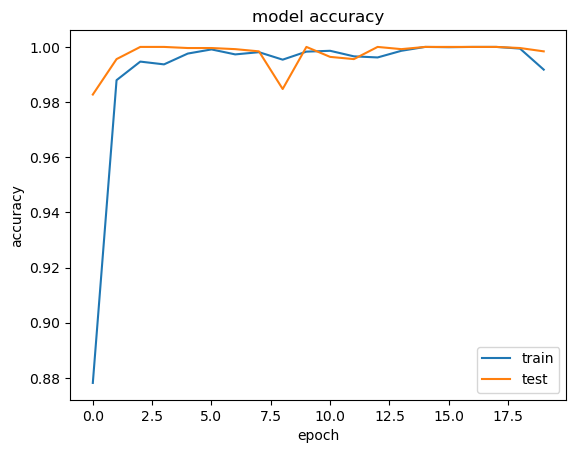

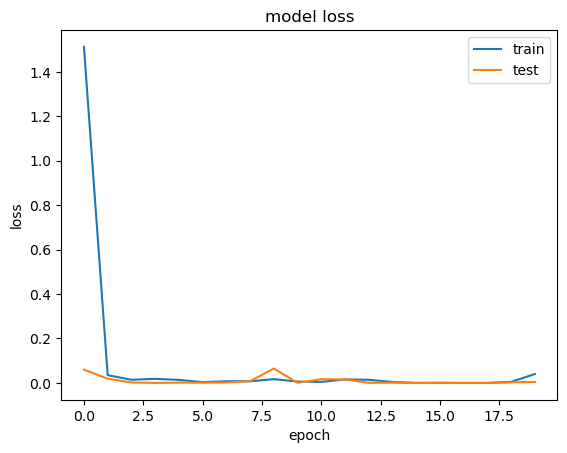

78/78 [==============================] - 108s 1s/step
[[771   1   0   0]
 [  0 994   0   0]
 [  0   2 269   0]
 [  0   1   0 452]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       771
           1       1.00      1.00      1.00       998
           2       0.99      1.00      1.00       269
           3       1.00      1.00      1.00       452

    accuracy                           1.00      2490
   macro avg       1.00      1.00      1.00      2490
weighted avg       1.00      1.00      1.00      2490

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
200/200 [==============================] - 1695s 8s/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 1.2754e-04 - val_accuracy: 1.0000
Epoch 2/20
200/200 [==============================] - 1452s 7s/step - loss: 1.3270e-04 - accuracy: 1.0000 - val_loss: 5.5196e-07 - val_accuracy: 1.0000
Epoch 3/20
200/200 [=================

In [ ]:
# Define the K-fold Cross Validator
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
      
  history=hyb_model.fit(inputs[train],targets[train],batch_size=50,epochs=20,verbose=1,validation_data=(inputs[test],targets[test]))
  scores=hyb_model.evaluate(inputs[test],targets[test],verbose=0)
  print(f'Score for fold {fold_no}: {hyb_model.metrics_names[0]} of {scores[0]}; {hyb_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])



  #plot accuracy and loss
  import matplotlib.pyplot as plt

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()
    
  y_pred = hyb_model.predict(inputs[test])
  y_pred = np.argmax(y_pred, axis=1)
  list(y_pred)
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(targets[test], y_pred)
  print(cm)
  sns.heatmap(cm, cmap="plasma", annot=True, fmt='d')  
    
  from sklearn.metrics import classification_report

  print(classification_report(y_pred, targets[test]))

  # Increase fold number
  fold_no = fold_no + 1 

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')